Dane: https://www.kaggle.com/datasets/benpowis/customer-propensity-to-purchase-data
Cel: analiza czy dany klient wykona u nas zakupy czy nie
Stakeholder: właściciel sklepu internetowego starający się zminimalizować ryzyko występowania porzuconego koszyka

Pobieranie i przygotowanie danych

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('training_sample.csv')

In [3]:
df.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


Eksploracja danych (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [5]:
df.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

In [7]:
# Usunięcie kolumny UserID - nie jest istotna dla modelu, bo to tylko identyfikator
df.drop(columns=['UserID'], inplace=True)

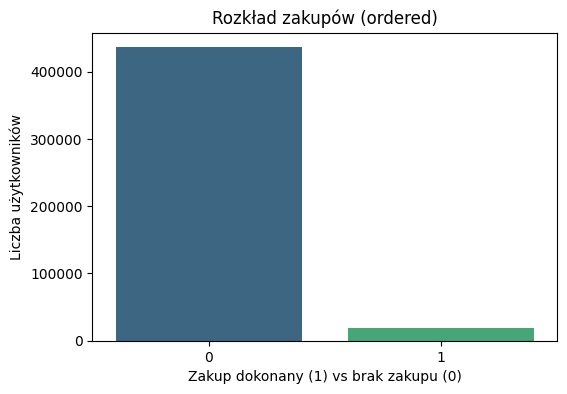

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="ordered", palette="viridis")
plt.title("Rozkład zakupów (ordered)")
plt.xlabel("Zakup dokonany (1) vs brak zakupu (0)")
plt.ylabel("Liczba użytkowników")
plt.show()


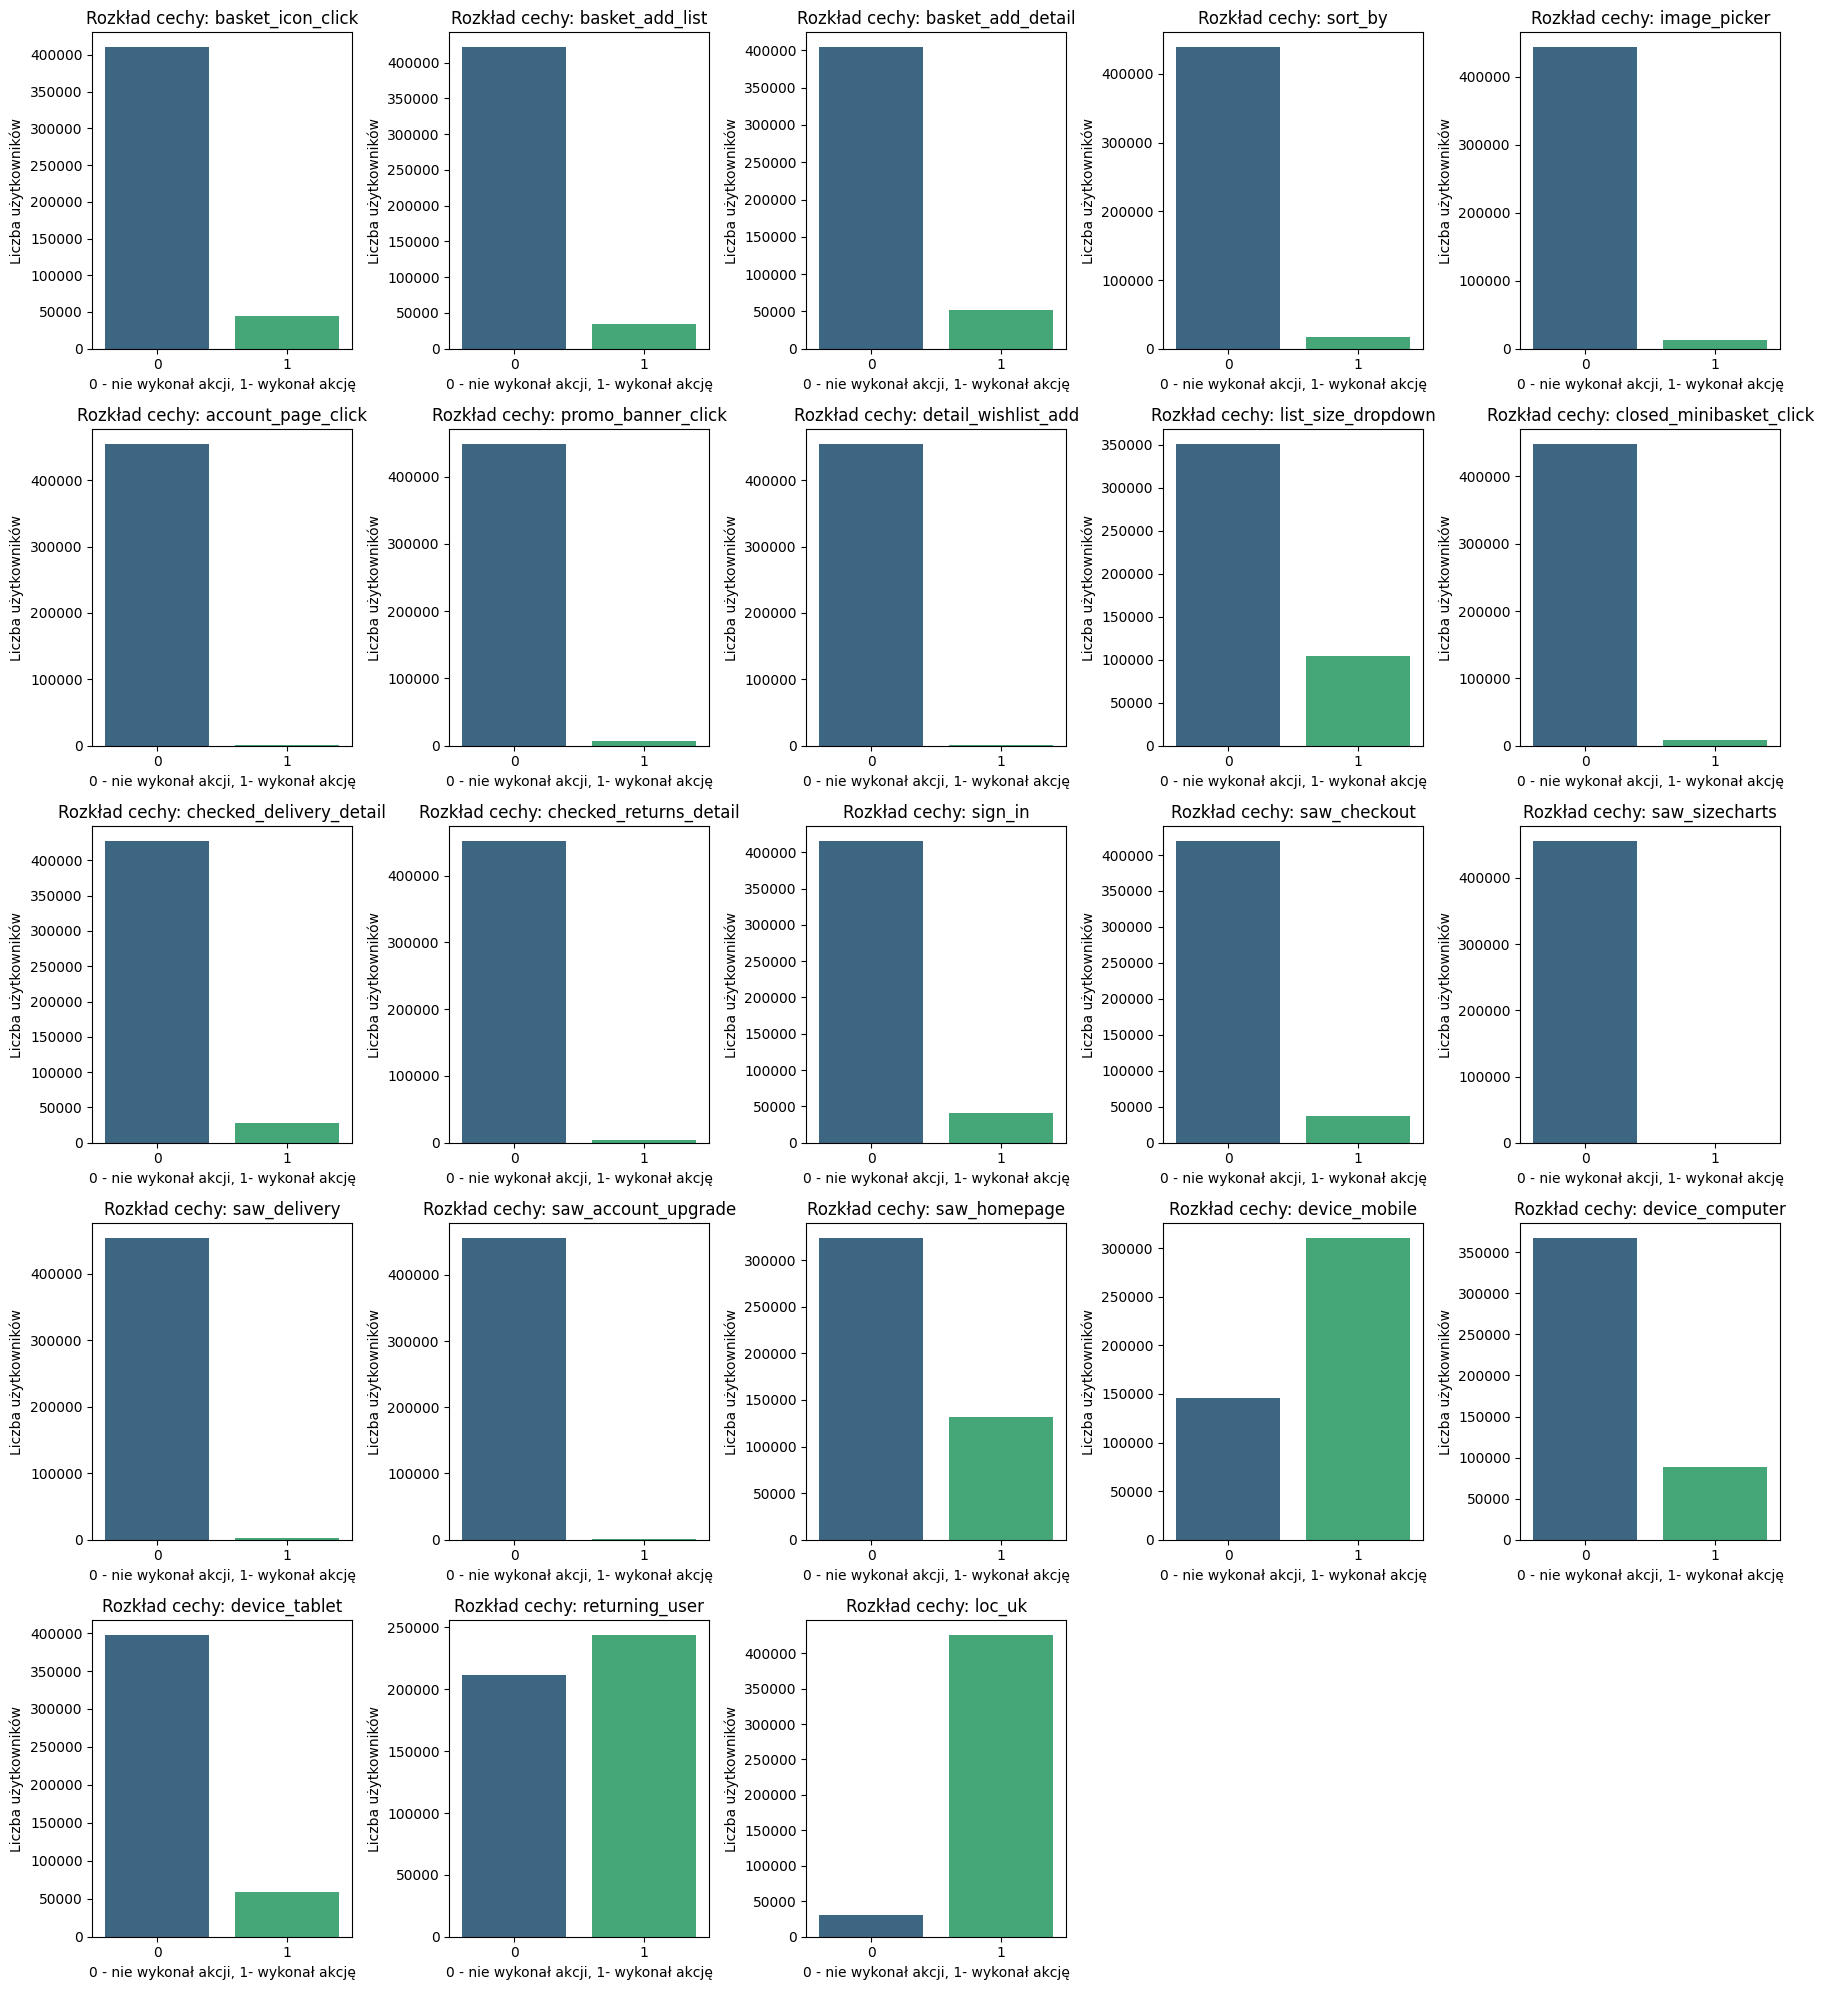

In [9]:
features = ['basket_icon_click','basket_add_list','basket_add_detail','sort_by','image_picker',
                   'account_page_click','promo_banner_click','detail_wishlist_add','list_size_dropdown',
                   'closed_minibasket_click','checked_delivery_detail','checked_returns_detail','sign_in',
                   'saw_checkout','saw_sizecharts','saw_delivery','saw_account_upgrade','saw_homepage',
                   'device_mobile','device_computer','device_tablet','returning_user','loc_uk']

plt.figure(figsize=(18, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 5, i)
    sns.countplot(data=df, x=feature, palette="viridis")
    plt.title(f"Rozkład cechy: {feature}")
    plt.xlabel("0 - nie wykonał akcji, 1- wykonał akcję")
    plt.ylabel("Liczba użytkowników")

plt.tight_layout()
plt.show()

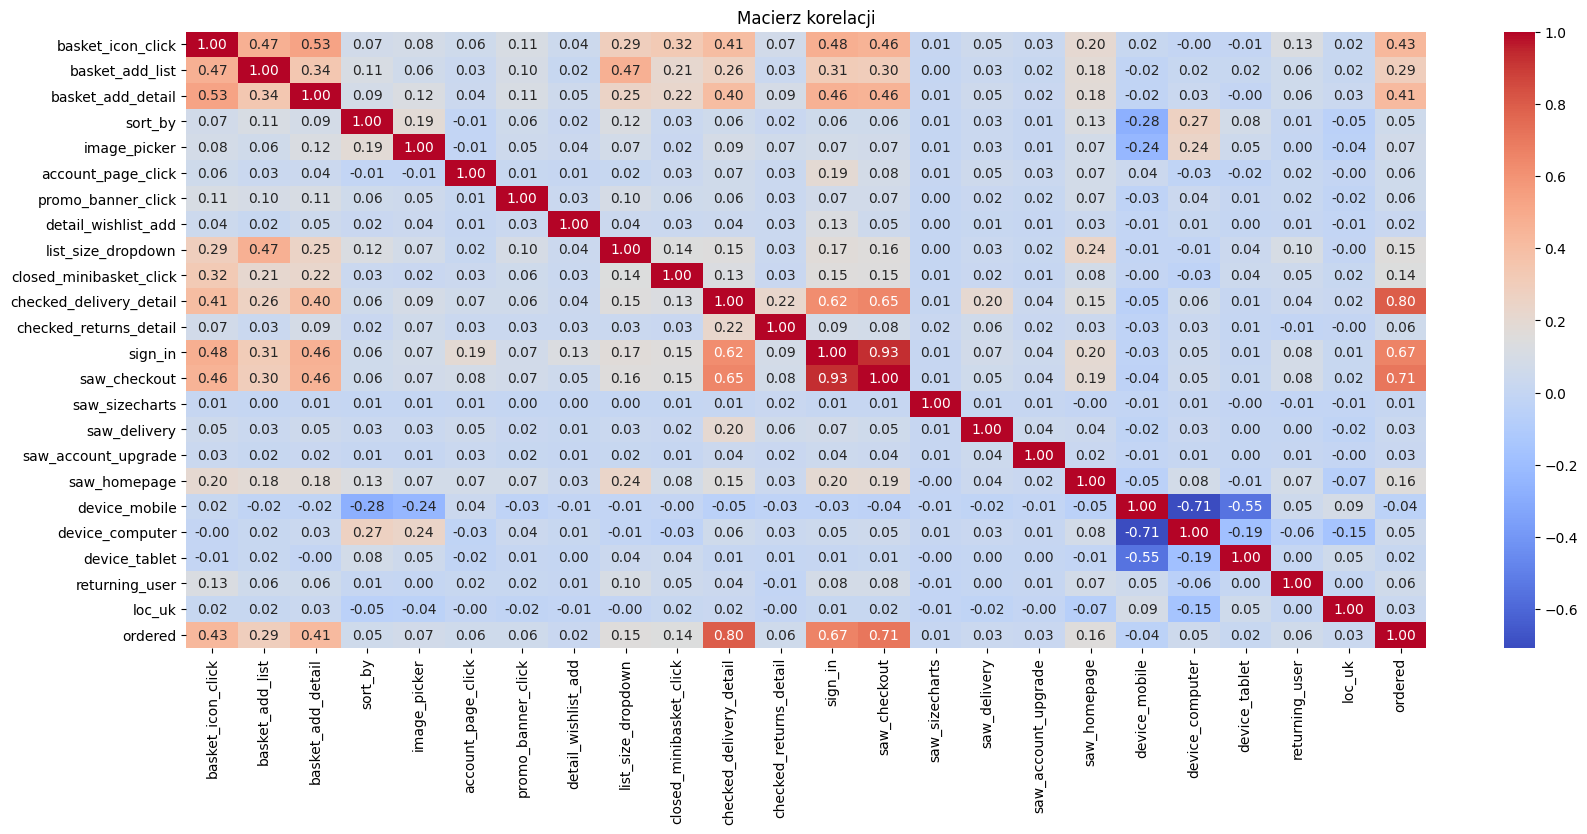

In [10]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Macierz korelacji")
plt.show()

In [11]:
# obliczenie korelacji pomiędzy zmiennymi w DataFrame, a następnie posortowanie  wyników korelacji względem kolumny Ordered
df.corr()['ordered'].sort_values(ascending=False)

ordered                    1.000000
checked_delivery_detail    0.798720
saw_checkout               0.708986
sign_in                    0.665556
basket_icon_click          0.428334
basket_add_detail          0.414420
basket_add_list            0.287666
saw_homepage               0.157778
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
image_picker               0.071492
returning_user             0.060295
checked_returns_detail     0.059484
account_page_click         0.057279
promo_banner_click         0.056533
sort_by                    0.054636
device_computer            0.049208
loc_uk                     0.031643
saw_delivery               0.031461
saw_account_upgrade        0.025857
detail_wishlist_add        0.023516
device_tablet              0.016939
saw_sizecharts             0.007548
device_mobile             -0.042907
Name: ordered, dtype: float64

Wysoka korelacja z ordered:
 - checked_delivery_detail ma bardzo wysoką korelację z ordered. Oznacza to, że jeśli użytkownik sprawdza szczegóły dostawy, jest znacznie bardziej prawdopodobne, że dokona zakupu.
 - saw_checkout – użytkownicy, którzy widzieli stronę z podsumowaniem zamówienia, mają większe szanse na dokonanie zakupu.
 - sign_in – użytkownicy, którzy się logują, są bardziej skłonni do dokonania zakupu.

Umiarkowana korelacja:
 - basket_icon_click – Kliknięcie ikony koszyka wskazuje na stosunkowo silną korelację z finalizowaniem zamówienia.
 - basket_add_detail – Dodanie produktu do koszyka z poziomu strony szczegółów produktu ma dość wysoką korelację z dokonaniem zakupu.
 - basket_add_list – Dodanie produktu do koszyka z listy produktów ma średnią korelację z finalizowaniem zakupu.

Słaba korelacja:
 - device_mobile i device_tablet: Te zmienne pokazują bardzo słabą korelację z ordered, sugerując, że typ urządzenia (mobilne lub tabletowe) nie ma znaczącego wpływu na to, czy użytkownik dokona zakupu.
 - saw_sizecharts – Przeglądanie tabeli rozmiarów ma bardzo słabą korelację z dokonaniem zakupu.

Dodatkowe zmienne:
 - saw_homepage (0.157778) – Wizyta na stronie głównej ma nieco wyższą korelację, ale nadal jest to stosunkowo niska wartość w kontekście zakupu.
 - returning_user (0.060295) – Powracający użytkownicy mają minimalnie wyższą tendencję do dokonywania zakupów, ale to nie jest bardzo silna korelacja.
 - list_size_dropdown (0.154867) – Interakcja z rozwijanym menu rozmiarów może również wpływać na zakupy, ale nie jest to silna korelacja.

WNIOSKI

Wysoka korelacja z zakupami występuje w przypadku interakcji użytkowników w zaawansowanej fazie procesu zakupowego, takich jak sprawdzanie szczegółów dostawy, widok koszyka czy logowanie się.
Słaba korelacja z ordered wskazuje na mniejsze znaczenie interakcji na wcześniejszych etapach ścieżki zakupowej, jak przeglądanie strony głównej, dodawanie produktów z listy czy przeglądanie tabeli rozmiarów. Warto skupić się na działaniach mających na celu zwiększenie zaangażowania użytkowników w finalne etapy procesu zakupowego, takie jak zachęcanie do logowania się czy sprawdzania szczegółów dostawy.

Przygotowanie danych do modelu

In [12]:
# podział na zmienne X i zmienną docelową y

X = df.drop('ordered', axis=1)
y = df['ordered']

In [13]:
# podział modelu na zbiór treningowy i testowy

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
print('Train shape: ', X_train.shape,y_train.shape)
print('Test shape: ',X_test.shape, y_test.shape)

Train shape:  (364320, 23) (364320,)
Test shape:  (91081, 23) (91081,)


In [15]:
# wykonuje standaryzjację danych
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# trening modelu regresji logistycznej - odpowiednia dla klasyfikacji binarnej (czy dany klient wykona u nas zakupy czy nie)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)


LogisticRegression()

In [17]:
# predykcja na zbiorze testowym

y_pred = model_LR.predict(X_test)

In [18]:
# ocena dokładności modelu

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9930830798959168
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87295
           1       0.87      0.99      0.92      3786

    accuracy                           0.99     91081
   macro avg       0.93      0.99      0.96     91081
weighted avg       0.99      0.99      0.99     91081



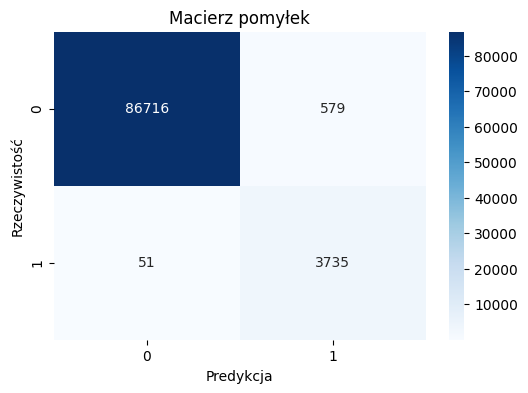

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywistość")
plt.title("Macierz pomyłek")
plt.show()

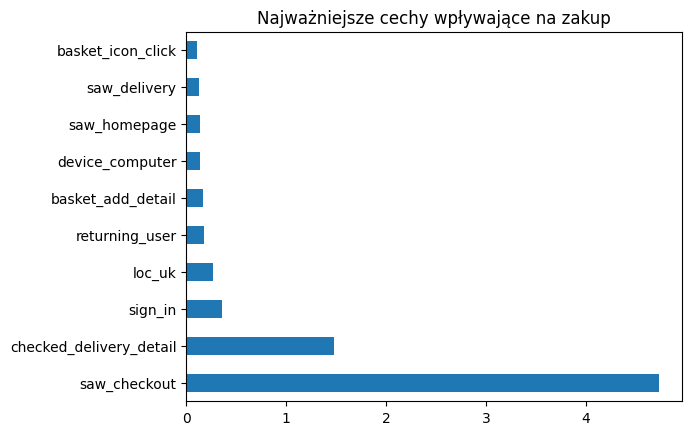

In [20]:
import numpy as np

feature_importance = pd.Series(np.abs(model_LR.coef_[0]), index=X.columns)
feature_importance.nlargest(10).plot(kind="barh")
plt.title("Najważniejsze cechy wpływające na zakup")
plt.show()


In [21]:
# Trening modelu RandomForestCLassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model_RFC = RandomForestClassifier(random_state=42)
model_RFC.fit(X_train, y_train)

# predykcja na zbiorze testowym
y_pred = model_RFC.predict(X_test)

# Dokładność modelu
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9927976197011451
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87295
           1       0.87      0.98      0.92      3786

    accuracy                           0.99     91081
   macro avg       0.93      0.98      0.96     91081
weighted avg       0.99      0.99      0.99     91081



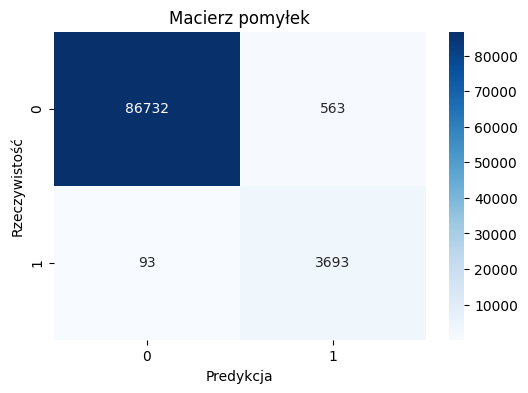

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywistość")
plt.title("Macierz pomyłek")
plt.show()


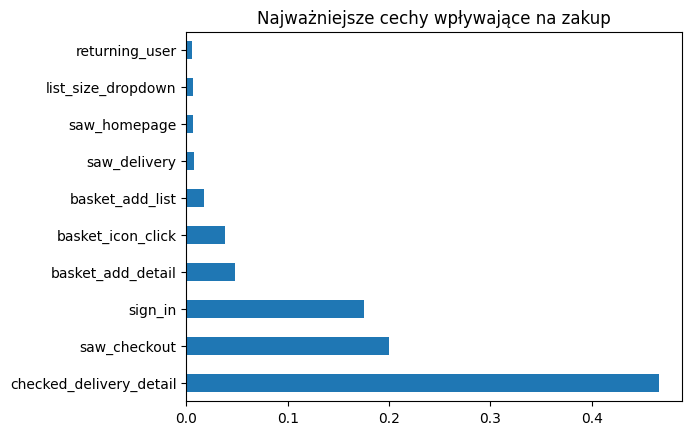

In [23]:
feature_importance = pd.Series(model_RFC.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind="barh")
plt.title("Najważniejsze cechy wpływające na zakup")
plt.show()


Porównanie modeli regresjii logistycznej z lasami losowymi oraz zastosowanie GridSearchCV do wyszukania najlepszych parametrów jak i najlepszego model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definiowanie modeli
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier(random_state=42))
]

# Parametry do sprawdzenia w GridSearchCV
param_grid = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10], # im mniejsze floaty tym większa regularyzacja
        "solver": ["liblinear", "saga"]  #przy mniejszych zbiorach danych liblinear, a przy większych saga jest szybszy
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    }
}


Zastosowanie GridSearchCV na każdym z modeli, wybór najlepszych parametrów, a także ocena ich skuteczności za pomocą cross-validation

In [25]:
best_model = None
best_score = 0

for model_name, model in models:
    print(f"Trening modelu: {model_name}")
    
    # Tworzenie GridSearchCV
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring="accuracy", n_jobs=-1)
    
    # Dopasowanie modelu
    grid_search.fit(X_train, y_train)
    
    print(f"Najlepsze parametry dla {model_name}: {grid_search.best_params_}")
    
    # Sprawdzenie wyników
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_

print(f"Najlepszy model: {best_model}")


Trening modelu: Logistic Regression
Najlepsze parametry dla Logistic Regression: {'C': 0.1, 'solver': 'saga'}
Trening modelu: Random Forest
Najlepsze parametry dla Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Najlepszy model: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)


Ocena najlepszego modelu

In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Predykcja na zbiorze testowym
y_pred = best_model.predict(X_test)

# Ocena dokładności
print(f"Dokładność najlepszego modelu: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Dokładność najlepszego modelu: 0.9930281837046145
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87295
           1       0.86      0.99      0.92      3786

    accuracy                           0.99     91081
   macro avg       0.93      0.99      0.96     91081
weighted avg       0.99      0.99      0.99     91081



Model poprawnie sklasyfikował około 99.3% wszystkich próbek, głównie dzięki dominacji klasy 0 w danych.
Dla klasy 0 model działa idealnie (precyzja i F1-score na poziomie 1).
Dla klasy 1 model błędnie klasyfikuje próby jako pozytywne (0.86), ale ma wysoką czułość.
Model dobrze wykrywa przypadki klasy 1, ale generuje przypadki False Positive'ów.

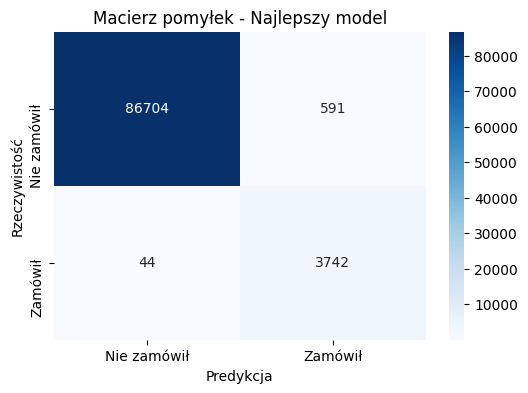

In [27]:
# Obliczanie macierzy pomyłek dla wybranego najlepszego modelu
cm = confusion_matrix(y_test, y_pred)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Nie zamówił", "Zamówił"], yticklabels=["Nie zamówił", "Zamówił"])
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywistość")
plt.title("Macierz pomyłek - Najlepszy model")
plt.show()

Najlepszy model to Random Forest z parametrami:
- max_depth=10
- min_samples_split=2
- n_estimators=200
- random_state=42

In [31]:
# Parametry do dalszej optymalizacji
param_grid_rf = {
    "n_estimators": [200],
    "max_depth": [8, 10, 12],          # Węższy zakres wokół najlepszej wartości
    "min_samples_split": [2, 5, 10],   # Więcej wartości do sprawdzenia
    "min_samples_leaf": [1, 2, 4],     # Liczba minimalnych próbek na liść
    "max_features": ["sqrt", "log2"],  # Liczba cech do rozważenia przy podziale
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    rf, 
    param_grid_rf, 
    cv=5, 
    scoring="accuracy",       
    n_jobs=-1, 
    verbose=2
)

grid_search_rf.fit(X_train, y_train)


print(f"Najlepsze parametry: {grid_search_rf.best_params_}")
print(f"Najlepszy wynik dokładności: {grid_search_rf.best_score_}")


best_rf_model = grid_search_rf.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Najlepsze parametry: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Najlepszy wynik dokładności: 0.9931982872200263


Ocena modelu po dodaniu parametrów (ulepszeniu)

In [32]:
y_pred = best_rf_model.predict(X_test)


print("Raport klasyfikacji:")
print(classification_report(y_test, y_pred))


print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred))


Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87295
           1       0.86      0.99      0.92      3786

    accuracy                           0.99     91081
   macro avg       0.93      0.99      0.96     91081
weighted avg       0.99      0.99      0.99     91081

Macierz pomyłek:
[[86704   591]
 [   47  3739]]


Zastosowanie RandomizedSearchCV na RandomForestClassifier zamiast GridSearchCV

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Parametry do przeszukania (szerszy zakres)
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [5, 10, 15, 20, 25, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

# RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=50,       # Liczba losowych kombinacji (więcej = dokładniej)
    cv=5,
    scoring="roc_auc", # Użycie metryki ROC-AUC
    n_jobs=-1, 
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)


print(f"Najlepsze parametry: {random_search.best_params_}")
print(f"Najlepszy wynik ROC-AUC: {random_search.best_score_}")


best_rf_model = random_search.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Najlepsze parametry: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': False}
Najlepszy wynik ROC-AUC: 0.9974871433743561


Ocena modelu przy użyciu metryki ROC-AUC, która jest bardziej odpowiednia w przypadku niezrównoważonych danych.

In [34]:
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

print("Raport klasyfikacji:")
print(classification_report(y_test, y_pred))

print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc}")


Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87295
           1       0.86      0.99      0.92      3786

    accuracy                           0.99     91081
   macro avg       0.93      0.99      0.96     91081
weighted avg       0.99      0.99      0.99     91081

Macierz pomyłek:
[[86708   587]
 [   46  3740]]
ROC-AUC: 0.9974584950925854


- 86708 prawidłowych klasyfikacji klasy 0
- 3740 prawidłowych klasyfikacji klasy 1
- 587 fałszywie pozytywnych przypadków (klasa 1 zaklasyfikowana jako 0)
- 46 fałszywie negatywnych przypadków (klasa 0 zaklasyfikowana jako 1)
- Model bardzo dobrze rozpoznaje klasę 1, ale wciąż zdarzają się nieliczne błędne klasyfikacje
- ROC-AUC wynosi 0.997, co świadczy o doskonałej zdolności modelu do rozróżniania między klasami.